# 14-2 나이브베이즈 분류

<br>

## 베이즈 정리 
- 나이브 베이즈 알고리즘의 기본이 되는 개념 
- 두 확률 변수의 사전 확률과 사후 확률 사이의 관계를 나타내는 정리 
<br> 
- 사건 A, B가 있을 때, 사건 B가 일어난 것을 전제로 한 사건 A의 조건부 확률을 구하고자 한다 
- 하지만 현재 가지고 있는 정보는 사건 A가 일어난 것을 전제로 한 사건 B의 조건부 확률과 A의 확률, B의 확률 뿐이다. 
- 이 때, 원래 구하고자 했던 것을 다음과 같이 구할 수 있다는 것이 베이즈 정리이다. 

<img src=./베이즈정리.png width="600">


## 나이브 베이즈 분류 
<b>종류</b>
1. GaussianNB: 정규분포 나이브베이즈
- 독립변수가 연속형일 때

2. BernoulliNB: 베르누이분포 나이브베이즈
- 독립변수가 이산형일 때

3. MultinomialNB: 다항분포 나이브베이즈
- 다항분류

<b>개념</b>


- 나이브 베이즈 분류는 하나의 속성 값을 기준으로 다른 속성이 독립적이라 전제했을 때 해당 속성 값이 클래스 분류에 미치는 영향을 측정한다. 
- 속성값에 대해 다른 속성이 독립적이라는 가정은 클래스 조건 독립성(Class confitional independence)이라 한다. 
- n개의 특징에 대한 결합 조건부 분포는 특징들의 분포를 곱한 것으로 표현할 수 있음
<img src=./나이브베이즈정리.png width="600">




### ** 베이지안 접근을 선택할 수 있는 두가지 경우 


#### 1. 과거의 빈도를 보여주는 데이터가 많지 않거나 자주 일어나지 않는 사건이어서 빈도주의적 추론의 사용이 마땅치 않을 때이다. <br> <br>이 때는 빈도가 워낙 작아서 전통적 추정의 신뢰도가 크게 떨어지기 때문이다. 

#### 2. 추정의 목적이 모수 자체의 추정보다는 미래의 예측에 있는 경우이다.  <br> <br>베이지안 접근은 하나의 추정치를 고집하는 것이 아니라 계속해서 값을 수정하면서 좀더 현실적인 추정치를 찾아나가기 때문에 예측의 목적에 잘 맞는 방법이다.

# 1. GaussianNB

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

credit = pd.read_csv("C:/adp/data/credit_final.csv")
X = credit[credit.columns.difference(['credit.rating'])]
y = credit['credit.rating']

# Hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=2021)
X_train.head()

,account.balance,age,apartment.type,bank.credits,credit.amount,credit.duration.months,credit.purpose,current.assets,dependents,employment.duration,foreign.worker,guarantor,installment.rate,marital.status,occupation,other.credits,previous.credit.payment.status,residence.duration,savings,telephone
915,1,22,2,1,2462,18,2,3,1,2,1,1,2,3,3,2,2,2,1,1
704,1,67,2,2,1169,6,3,1,1,4,1,1,4,3,3,2,3,4,4,2
992,1,51,3,1,7511,18,1,2,2,4,1,1,1,3,3,2,2,4,4,2
633,1,30,2,1,3959,36,2,2,1,1,1,1,4,3,4,2,2,3,1,2
952,2,39,2,1,1188,21,4,2,2,4,1,1,2,1,3,2,2,4,1,1


In [2]:
from sklearn.naive_bayes import GaussianNB

In [8]:
help(GaussianNB)

Help on class GaussianNB in module sklearn.naive_bayes:

class GaussianNB(_BaseNB)
 |  GaussianNB(*, priors=None, var_smoothing=1e-09)
 |  
 |  Gaussian Naive Bayes (GaussianNB).
 |  
 |  Can perform online updates to model parameters via :meth:`partial_fit`.
 |  For details on algorithm used to update feature means and variance online,
 |  see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:
 |  
 |      http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf
 |  
 |  Read more in the :ref:`User Guide <gaussian_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  priors : array-like of shape (n_classes,)
 |      Prior probabilities of the classes. If specified the priors are not
 |      adjusted according to the data.
 |  
 |  var_smoothing : float, default=1e-9
 |      Portion of the largest variance of all features that is added to
 |      variances for calculation stability.
 |  
 |      .. versionadded:: 0.20
 |  
 |  Attributes
 |  ----------
 |  

In [4]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print("accuracy_score : ", gnb.score(X_test, y_test))

accuracy_score :  0.7433333333333333


In [5]:
gnb.class_prior_

array([0.3, 0.7])

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score 

In [9]:
# y_test
confusion_Naive= pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['True[0]', 'True[1]'],
             columns=['Pred[0]','Pred[1]'])

print(f"정밀도 : {precision_score(y_test, y_pred)}")
print(f"재현율 : {recall_score(y_test, y_pred)}")
print(f"F1 스코어 : {f1_score(y_test, y_pred)}")
confusion_Naive

정밀도 : 0.8481675392670157
재현율 : 0.7714285714285715
F1 스코어 : 0.8079800498753118


,Pred[0],Pred[1]
True[0],61,29
True[1],48,162


In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, roc_auc_score

C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


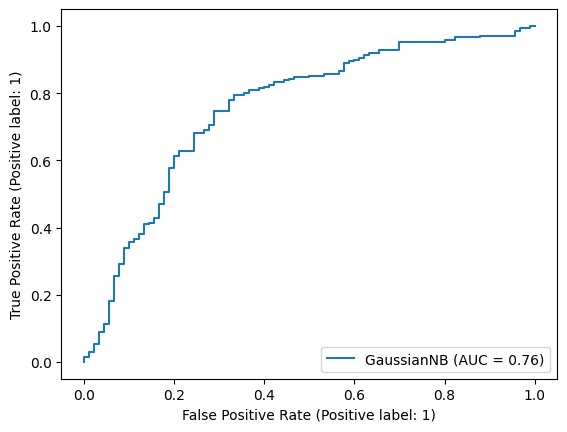

roc_auc_score : 0.7562433862433863


In [11]:
plot_roc_curve(gnb, X_test, y_test)
plt.show()
print("roc_auc_score :", roc_auc_score(y_test, gnb.predict_proba(X_test)[:,1]))

In [13]:
### 데이터의 수가 적을 경우에 아래와 같이 사전확률을 정해줄 수 있습니다. 
#### priors : 사전확률 0 : 50% , 사전확률 1 : 50% 
gnb2=GaussianNB(priors=[0.5, 0.5])
gnb2.fit(X_train,y_train)
y_pred2=gnb2.predict(X_test)
print("accuracy_score : ", gnb2.score(X_test, y_test))

accuracy_score :  0.6733333333333333


# 2.BernoulliNB naive bayes

In [14]:
df_t = pd.read_csv('C:/adp/data/titanic.csv')
X = pd.get_dummies(data=df_t[['class','sex','embark_town']],columns=['class','sex','embark_town'])
y = df_t['survived']

In [15]:
from sklearn.naive_bayes import BernoulliNB
bernoulli= BernoulliNB()
bernoulli.fit(X, y)

BernoulliNB()

In [16]:
bernoulli.class_log_prior_

array([-0.48424599, -0.95753369])

In [17]:
import numpy as np 
np.exp(bernoulli.class_log_prior_)

array([0.61616162, 0.38383838])

In [20]:
X.tail()

,class_First,class_Second,class_Third,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
886,0,1,0,0,1,0,0,1
887,1,0,0,1,0,0,0,1
888,0,0,1,1,0,0,0,1
889,1,0,0,0,1,1,0,0
890,0,0,1,0,1,0,1,0


In [21]:
# 1등석, 여성, 셰르부르인 사람의 생존율 예측 
X_test= [[1, 0, 0, 0, 1, 1, 0, 0]]

bernoulli.predict_proba(X_test)

C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  "X does not have valid feature names, but"


array([[0.41528384, 0.58471616]])

# 3. Multinomial naive bayes
- 독립변수가 이산형이 아닌 범주형 변수인 경우 사용 

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
X = np.random.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])

In [24]:
X

array([[3, 1, 2, 0, 3, 1, 1, 0, 3, 0, 1, 2, 3, 1, 3, 2, 2, 4, 2, 0, 1, 4,
        3, 1, 1, 3, 1, 4, 1, 0, 0, 0, 3, 0, 4, 0, 2, 2, 1, 0, 0, 3, 2, 4,
        4, 2, 2, 2, 1, 2, 4, 1, 2, 3, 3, 3, 2, 2, 0, 0, 4, 3, 3, 2, 0, 1,
        0, 1, 0, 4, 1, 0, 4, 0, 4, 2, 2, 0, 0, 4, 2, 3, 4, 4, 3, 1, 2, 2,
        0, 3, 2, 0, 3, 2, 1, 3, 3, 3, 1, 3],
       [2, 1, 1, 2, 3, 2, 1, 2, 1, 1, 4, 4, 3, 2, 0, 2, 0, 4, 3, 2, 0, 3,
        4, 2, 3, 3, 0, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 2, 2, 3, 4, 4, 3,
        2, 3, 4, 2, 0, 3, 4, 0, 1, 0, 3, 4, 0, 2, 2, 2, 2, 3, 2, 3, 3, 1,
        0, 4, 0, 4, 4, 4, 4, 2, 4, 3, 3, 1, 3, 3, 3, 4, 2, 2, 0, 3, 3, 3,
        4, 4, 2, 0, 4, 4, 0, 1, 4, 2, 0, 0],
       [4, 2, 0, 2, 4, 4, 0, 4, 3, 2, 3, 0, 3, 3, 4, 2, 4, 3, 2, 4, 2, 2,
        1, 1, 4, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 3, 2, 1, 3, 0, 4, 0,
        2, 3, 4, 2, 1, 4, 4, 0, 1, 1, 4, 2, 2, 1, 1, 4, 3, 3, 0, 2, 2, 3,
        0, 1, 4, 2, 3, 1, 2, 2, 2, 1, 3, 2, 0, 2, 1, 1, 1, 1, 4, 2, 4, 2,
        2, 1, 0, 4, 1,

In [25]:
y

array([1, 2, 3, 4, 5, 6])

In [26]:
clf = MultinomialNB()
clf.fit(X, y)

MultinomialNB()

In [27]:
np.exp(clf.class_log_prior_)

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [28]:
clf.predict_proba( [X[3]] )

array([[9.45765381e-34, 1.34856209e-38, 2.67375946e-34, 1.00000000e+00,
        2.19229602e-28, 6.55784106e-30]])